create intemediate file for each person with selected features for emotional transision recognition

In [ ]:
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#load the master file created in step D4

df= pd.read_csv('data/raw_Emotion_pALL_ALLFeat_updated2.csv')
df.head()

In [2]:
#read each person's data at a time
#p=[8, 10, 12, 13, 15, 20, 21, 25, 27, 33, 35, 40, 46, 48, 49, 52, 54, 55]
p=8
one_person_df=df.loc[df['person'] == p]
one_person_df.head()


,timestamp,person,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,cl_latitude,cl_longitude,minute_of_hour,minute_of_day,time_diff_in_minute,pleasant_score,arousal_score,geo_dist,dominance_score,emotion
0,1.440094e+09,8,1.001473,0.126916,0.209004,0.333994,0.956588,0.992468,1.033735,1.399579,...,32.881,-117.234,7,1087,0.000000,8.47,6.05,0.000000,7.21,2.0
1,1.440094e+09,8,1.020985,0.211577,0.189190,0.312424,0.875169,1.003510,1.153094,2.234364,...,32.881,-117.234,8,1088,1.000000,8.47,6.05,5.040893,7.21,2.0
2,1.440094e+09,8,1.036591,0.285806,-0.132830,0.343141,0.788695,1.072480,1.272836,2.705906,...,32.881,-117.235,9,1089,1.000000,8.47,6.05,65.809210,7.21,2.0
3,1.440094e+09,8,1.076537,0.265645,0.142064,0.322576,0.854440,1.071343,1.288627,2.813417,...,32.880,-117.235,10,1090,1.016667,8.47,6.05,40.436150,7.21,2.0
4,1.440094e+09,8,1.152467,0.350221,0.292778,0.439607,0.857681,1.070274,1.418371,2.739190,...,32.880,-117.235,11,1091,0.983333,8.47,6.05,55.765343,7.21,2.0


In [3]:
#list(one_person_df)

In [4]:
one_person_df.shape[1]

283

In [5]:
#define window size or time interval
window_size=5
new_col=(one_person_df['minute_of_day']//window_size)
new_col
#create a new column #window and assign window value based on the minute_of_day variable

one_person_df.insert(one_person_df.shape[1]-4, column='#window', value=new_col)
one_person_df.head()

,timestamp,person,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,cl_longitude,minute_of_hour,minute_of_day,time_diff_in_minute,pleasant_score,#window,arousal_score,geo_dist,dominance_score,emotion
0,1.440094e+09,8,1.001473,0.126916,0.209004,0.333994,0.956588,0.992468,1.033735,1.399579,...,-117.234,7,1087,0.000000,8.47,217,6.05,0.000000,7.21,2.0
1,1.440094e+09,8,1.020985,0.211577,0.189190,0.312424,0.875169,1.003510,1.153094,2.234364,...,-117.234,8,1088,1.000000,8.47,217,6.05,5.040893,7.21,2.0
2,1.440094e+09,8,1.036591,0.285806,-0.132830,0.343141,0.788695,1.072480,1.272836,2.705906,...,-117.235,9,1089,1.000000,8.47,217,6.05,65.809210,7.21,2.0
3,1.440094e+09,8,1.076537,0.265645,0.142064,0.322576,0.854440,1.071343,1.288627,2.813417,...,-117.235,10,1090,1.016667,8.47,218,6.05,40.436150,7.21,2.0
4,1.440094e+09,8,1.152467,0.350221,0.292778,0.439607,0.857681,1.070274,1.418371,2.739190,...,-117.235,11,1091,0.983333,8.47,218,6.05,55.765343,7.21,2.0


In [6]:
#aggregate latitude in 5-minute window
one_person_df.groupby(['day_of_month','#window']).agg({'cl_latitude': "mean"})


cl_latitude
day_of_month #window             
20           217        32.881000
             218        32.879600
             219        32.879000
             220        32.879000
24           20         32.865000
             21         32.865600
             22         32.865500
             226        32.878000
             227        32.876600
             228        32.875200
             229        32.875000
             230        32.875000
             231        32.875000
             232        32.875000
             233        32.875000
             234        32.875000
             235        32.875000
             236        32.875000
             237        32.875000
             238        32.875000
             239        32.875000
             240        32.875000
             241        32.875000
             242        32.875000
             243        32.875000
             244        32.875000
             245        32.875000
             246        32.875800
             247        32.878400
             248        32.878200
...                           ...
25           211        32.878000
             212        32.878000
             213        32.878000
             214        32.878600
             215        32.879400
             216        32.879000
             217        32.879000
             218        32.879000
             219        32.879000
             220        32.879000
             221        32.879000
             222        32.879000
             223        32.879000
             224        32.879000
             225        32.879000
             226        32.879000
             227        32.879000
             228        32.879000
             229        32.879000
             230        32.879000
             231        32.879000
             232        32.879000
             233        32.879000
             234        32.879000
             235        32.879000
             236        32.879000
             237        32.879000
             238        32.879833
             239        32.882400
             240        32.883000

[269 rows x 1 columns]

In [7]:
len(one_person_df.groupby(['day_of_month','#window']))

269

In [8]:
#

In [9]:
one_person_df.head() 

,timestamp,person,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,cl_longitude,minute_of_hour,minute_of_day,time_diff_in_minute,pleasant_score,#window,arousal_score,geo_dist,dominance_score,emotion
0,1.440094e+09,8,1.001473,0.126916,0.209004,0.333994,0.956588,0.992468,1.033735,1.399579,...,-117.234,7,1087,0.000000,8.47,217,6.05,0.000000,7.21,2.0
1,1.440094e+09,8,1.020985,0.211577,0.189190,0.312424,0.875169,1.003510,1.153094,2.234364,...,-117.234,8,1088,1.000000,8.47,217,6.05,5.040893,7.21,2.0
2,1.440094e+09,8,1.036591,0.285806,-0.132830,0.343141,0.788695,1.072480,1.272836,2.705906,...,-117.235,9,1089,1.000000,8.47,217,6.05,65.809210,7.21,2.0
3,1.440094e+09,8,1.076537,0.265645,0.142064,0.322576,0.854440,1.071343,1.288627,2.813417,...,-117.235,10,1090,1.016667,8.47,218,6.05,40.436150,7.21,2.0
4,1.440094e+09,8,1.152467,0.350221,0.292778,0.439607,0.857681,1.070274,1.418371,2.739190,...,-117.235,11,1091,0.983333,8.47,218,6.05,55.765343,7.21,2.0


In [10]:
# aggreegate selected variables to the time interval (window=5 minutes)
# continuous value: mean, binary value: sum
temp_df=one_person_df.groupby(['day_of_month','#window']).agg({'timestamp':"mean",\
                                                               'raw_acc:magnitude_stats:moment3':"mean",'raw_acc:magnitude_stats:moment4': "mean",\
                                                               'raw_acc:magnitude_stats:percentile25':"mean",\
                                                               'raw_acc:magnitude_stats:percentile75':"mean",\
                                                               'raw_acc:magnitude_stats:value_entropy':"mean",\
                                                               'raw_acc:magnitude_spectrum:log_energy_band1':"mean",\
                                                               'raw_acc:magnitude_autocorrelation:period':"mean",\
                                                               'raw_acc:magnitude_autocorrelation:normalized_ac':"mean",\
                                                               'raw_acc:3d:mean_y':"mean",'raw_acc:3d:mean_z':"mean",\
                                                               'raw_acc:3d:std_y':"mean",'raw_acc:3d:ro_xy':"mean",\
                                                               'raw_acc:3d:ro_yz':"mean",'proc_gyro:magnitude_stats:mean':"mean",\
                                                               'proc_gyro:magnitude_stats:moment3':"mean",\
                                                               'proc_gyro:magnitude_stats:moment4':"mean",'proc_gyro:magnitude_stats:percentile25':"mean",\
                                                               'proc_gyro:magnitude_stats:percentile50':"mean",'proc_gyro:magnitude_stats:value_entropy':"mean",\
                                                               'proc_gyro:magnitude_stats:time_entropy':"mean",'proc_gyro:magnitude_spectrum:log_energy_band0':"mean",\
                                                               'proc_gyro:magnitude_spectrum:log_energy_band2':"mean",\
                                                               'proc_gyro:magnitude_spectrum:log_energy_band3':"mean",\
                                                               'proc_gyro:magnitude_spectrum:spectral_entropy':"mean",'proc_gyro:magnitude_autocorrelation:period':"mean",\
                                                               'proc_gyro:magnitude_autocorrelation:normalized_ac':"mean",'proc_gyro:3d:mean_x':"mean",\
                                                               'proc_gyro:3d:mean_y':"mean",'proc_gyro:3d:mean_z':"mean",'proc_gyro:3d:std_x':"mean",'proc_gyro:3d:std_y':"mean",\
                                                               'proc_gyro:3d:std_z':"mean",\
                                                               'proc_gyro:3d:ro_xy':"mean",'proc_gyro:3d:ro_xz':"mean",'proc_gyro:3d:ro_yz':"mean",\
                                                               'raw_magnet:magnitude_stats:mean':"mean",'raw_magnet:magnitude_stats:moment3':"mean",\
                                                               'raw_magnet:magnitude_stats:moment4':"mean",\
                                                               'raw_magnet:magnitude_stats:value_entropy':"mean",\
                                                               'raw_magnet:magnitude_stats:time_entropy':"mean",'raw_magnet:magnitude_spectrum:log_energy_band0':"mean",\
                                                               'raw_magnet:magnitude_autocorrelation:normalized_ac':"mean",\
                                                               'raw_magnet:3d:mean_x':"mean",'raw_magnet:3d:mean_y':"mean",'raw_magnet:3d:std_x':"mean",\
                                                               'raw_magnet:3d:ro_xy':'mean','raw_magnet:3d:ro_xz':'mean',\
                                                               'raw_magnet:3d:ro_yz':'mean','raw_magnet:avr_cosine_similarity_lag_range0':"mean",\
                                                               'raw_magnet:avr_cosine_similarity_lag_range1':"mean",\
                                                               'raw_magnet:avr_cosine_similarity_lag_range3':"mean",'raw_magnet:avr_cosine_similarity_lag_range4':"mean",\
                                                               'watch_acceleration:magnitude_stats:mean':"mean",'watch_acceleration:magnitude_stats:moment3':"mean",\
                                                               'watch_acceleration:magnitude_stats:moment4':"mean",\
                                                               'watch_acceleration:magnitude_stats:value_entropy': "mean",\
                                                               'watch_acceleration:magnitude_stats:time_entropy':"mean",\
                                                               'watch_acceleration:magnitude_spectrum:log_energy_band1': "mean",\
                                                               'watch_acceleration:magnitude_spectrum:log_energy_band4': "mean",\
                                                               'watch_acceleration:magnitude_autocorrelation:period': "mean",\
                                                               'watch_acceleration:3d:mean_y': "mean",'watch_acceleration:3d:mean_z': "mean",\
                                                               'watch_acceleration:3d:std_y': "mean",\
                                                               'watch_acceleration:3d:ro_xy': "mean",'watch_acceleration:3d:ro_yz': "mean",\
                                                               'watch_acceleration:spectrum:x_log_energy_band0': "mean",\
                                                               'watch_acceleration:spectrum:x_log_energy_band1': "mean",'watch_acceleration:spectrum:x_log_energy_band2': "mean",\
                                                               'watch_acceleration:spectrum:x_log_energy_band3': "mean",'watch_acceleration:spectrum:x_log_energy_band4': "mean",\
                                                               'watch_acceleration:spectrum:y_log_energy_band0': "mean",'watch_acceleration:spectrum:y_log_energy_band1': "mean",\
                                                               'watch_acceleration:spectrum:y_log_energy_band2': "mean",\
                                                               'watch_acceleration:spectrum:y_log_energy_band4': "mean",\
                                                               'watch_acceleration:spectrum:z_log_energy_band0': "mean",\
                                                               'watch_acceleration:spectrum:z_log_energy_band4': "mean",\
                                                               'watch_heading:mom3_cos': "mean",\
                                                               'watch_heading:mean_sin': "mean",\
                                                               'watch_heading:entropy_8bins': "mean",'location:num_valid_updates': "mean",\
                                                               'location:log_latitude_range': "mean",'location:log_longitude_range': "mean",'location:min_altitude': "mean",\
                                                               'location:max_altitude': "mean",\
                                                               'location:best_horizontal_accuracy': "mean",'location:best_vertical_accuracy': "mean",\
                                                               'location:diameter': "mean",'location:log_diameter': "mean",'location_quick_features:std_lat': "mean",\
                                                               'location_quick_features:lat_change': "mean",'location_quick_features:long_change': "mean",\
                                                               'location_quick_features:mean_abs_lat_deriv': "mean",\
                                                               'audio_naive:mfcc0:mean': "mean",'audio_naive:mfcc1:mean': "mean",\
                                                               'audio_naive:mfcc2:mean': "mean",'audio_naive:mfcc3:mean': "mean",'audio_naive:mfcc4:mean': "mean",\
                                                               'audio_naive:mfcc5:mean': "mean",'audio_naive:mfcc6:mean': "mean",'audio_naive:mfcc7:mean': "mean",\
                                                               'audio_naive:mfcc8:mean': "mean",\
                                                               'audio_naive:mfcc9:mean': "mean",'audio_naive:mfcc10:mean': "mean",'audio_naive:mfcc11:mean': "mean",\
                                                               'audio_naive:mfcc12:mean': "mean",\
                                                               'audio_naive:mfcc1:std': "mean",'audio_naive:mfcc2:std': "mean",'audio_naive:mfcc3:std': "mean",\
                                                               'audio_naive:mfcc4:std': "mean",'audio_naive:mfcc5:std': "mean",'audio_naive:mfcc6:std': "mean",\
                                                               'audio_naive:mfcc7:std': "mean",\
                                                               'audio_naive:mfcc8:std': "mean",'audio_naive:mfcc9:std': "mean",'audio_naive:mfcc10:std': "mean",\
                                                               'audio_naive:mfcc11:std': "mean",'audio_naive:mfcc12:std': "mean",\
                                                               'audio_properties:max_abs_value': "mean",\
                                                               'discrete:app_state:is_background': "sum",\
                                                               'discrete:app_state:missing': "sum",'discrete:battery_plugged:is_ac': "sum",\
                                                               'discrete:battery_plugged:missing':"sum",'discrete:battery_state:is_unplugged':"sum",\
                                                               'discrete:wifi_status:is_reachable_via_wifi':'sum',\
                                                               'lf_measurements:light':"mean",'lf_measurements:pressure':"mean",\
                                                               'lf_measurements:battery_level':"mean",'lf_measurements:screen_brightness':"mean",\
                                                               'lf_measurements:temperature_ambient':"mean",\
                                                               'label:LYING_DOWN': 'sum','label:SITTING': 'sum','label:FIX_walking': 'sum','label:SLEEPING': 'sum',\
                                                               'label:LOC_main_workplace': 'sum','label:OR_indoors': 'sum','label:OR_outside': 'sum','label:IN_A_CAR': 'sum','label:DRIVE_-_I_M_THE_DRIVER': 'sum',\
                                                               'label:PHONE_IN_POCKET': 'sum','label:OR_exercise': 'sum','label:COOKING': 'sum',\
                                                               'label:DRINKING__ALCOHOL_': 'sum','label:DOING_LAUNDRY': 'sum','label:WASHING_DISHES': 'sum','label:WATCHING_TV': 'sum',\
                                                               'label:SURFING_THE_INTERNET': 'sum','label:SINGING': 'sum','label:TALKING': 'sum','label:COMPUTER_WORK': 'sum','label:EATING': 'sum',\
                                                               'label:TOILET': 'sum','label:GROOMING': 'sum','label:OR_standing': 'sum',\
                                                               'label:AT_SCHOOL': 'sum','label:PHONE_IN_HAND': 'sum','label:PHONE_IN_BAG': 'sum','label:PHONE_ON_TABLE': 'sum','label:WITH_FRIENDS': 'sum',\
                                                               'hour_of_timestamp': "mean", 'day_of_timestamp':"max", 'day_of_month':"max", 'geo_dist': "mean", 'cl_latitude': "mean", 'cl_longitude': "mean", 'pleasant_score': "mean", 'arousal_score': "mean",'dominance_score': "mean"})

In [11]:
temp_df.shape

(269, 168)

In [12]:
a=one_person_df.groupby(['day_of_month','#window']).size().unstack(fill_value=0)

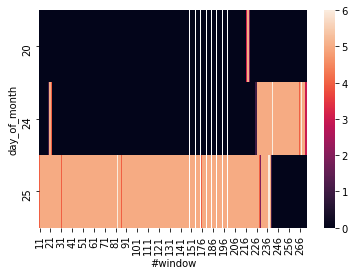

In [13]:
#visualize heatmap of present and missing windows
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(a, linewidth=0.0001)
plt.rcParams['figure.figsize'] = [5, 10]
plt.show()

In [14]:
one_person_df.head()

,timestamp,person,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,cl_longitude,minute_of_hour,minute_of_day,time_diff_in_minute,pleasant_score,#window,arousal_score,geo_dist,dominance_score,emotion
0,1.440094e+09,8,1.001473,0.126916,0.209004,0.333994,0.956588,0.992468,1.033735,1.399579,...,-117.234,7,1087,0.000000,8.47,217,6.05,0.000000,7.21,2.0
1,1.440094e+09,8,1.020985,0.211577,0.189190,0.312424,0.875169,1.003510,1.153094,2.234364,...,-117.234,8,1088,1.000000,8.47,217,6.05,5.040893,7.21,2.0
2,1.440094e+09,8,1.036591,0.285806,-0.132830,0.343141,0.788695,1.072480,1.272836,2.705906,...,-117.235,9,1089,1.000000,8.47,217,6.05,65.809210,7.21,2.0
3,1.440094e+09,8,1.076537,0.265645,0.142064,0.322576,0.854440,1.071343,1.288627,2.813417,...,-117.235,10,1090,1.016667,8.47,218,6.05,40.436150,7.21,2.0
4,1.440094e+09,8,1.152467,0.350221,0.292778,0.439607,0.857681,1.070274,1.418371,2.739190,...,-117.235,11,1091,0.983333,8.47,218,6.05,55.765343,7.21,2.0


In [15]:
temp_df.shape

(269, 168)

In [16]:
# calulate the motion as the mode of all emotion values within the same window
from scipy.stats import mode

temp_df['emotion']=one_person_df.groupby(['day_of_month','#window'])['emotion'].agg(lambda x:pd.Series.mode(x)[0])


In [17]:

#list(temp_df)

In [18]:
temp_df.shape

(269, 169)

In [19]:
print(temp_df.groupby('emotion').size())

emotion
1.0     40
2.0     15
3.0    162
6.0     52
dtype: int64


In [20]:
temp_df.head()

timestamp  raw_acc:magnitude_stats:moment3  \
day_of_month #window                                                  
20           217      1.440094e+09                         0.088455   
             218      1.440094e+09                         0.205309   
             219      1.440095e+09                         0.227730   
             220      1.440095e+09                         0.097187   
24           20       1.440381e+09                         0.179144   

                      raw_acc:magnitude_stats:moment4  \
day_of_month #window                                    
20           217                             0.329853   
             218                             0.398581   
             219                             0.365597   
             220                             0.167251   
24           20                              0.284605   

                      raw_acc:magnitude_stats:percentile25  \
day_of_month #window                                         
20           217                                  0.873484   
             218                                  0.857378   
             219                                  0.956374   
             220                                  0.987591   
24           20                                   0.928229   

                      raw_acc:magnitude_stats:percentile75  \
day_of_month #window                                         
20           217                                  1.153222   
             218                                  1.312268   
             219                                  1.074479   
             220                                  1.011220   
24           20                                   1.114429   

                      raw_acc:magnitude_stats:value_entropy  \
day_of_month #window                                          
20           217                                   2.113283   
             218                                   2.628939   
             219                                   1.621916   
             220                                   1.130517   
24           20                                    2.290474   

                      raw_acc:magnitude_spectrum:log_energy_band1  \
day_of_month #window                                                
20           217                                         0.468006   
             218                                         0.860350   
             219                                         0.608588   
             220                                         0.097474   
24           20                                          0.094596   

                      raw_acc:magnitude_autocorrelation:period  \
day_of_month #window                                             
20           217                                      1.347152   
             218                                      1.003815   
             219                                      1.047345   
             220                                      1.826943   
24           20                                       0.525969   

                      raw_acc:magnitude_autocorrelation:normalized_ac  \
day_of_month #window                                                    
20           217                                             0.424592   
             218                                             0.648932   
             219                                             0.219261   
             220                                             0.342166   
24           20                                              0.448579   

                      raw_acc:3d:mean_y  ...  hour_of_timestamp  \
day_of_month #window                     ...                      
20           217               0.403277  ...                 18   
             218               0.519087  ...                 18   
             219               0.190995  ...                 18   
             220     

In [21]:
temp_df.shape

(269, 169)

In [22]:
#drop all variables that contain all NANs
temp_df.dropna(axis=1,how='all', inplace=True)

In [23]:
temp_df.shape

(269, 166)

In [24]:
#reset the index
temp_df.reset_index(drop=True, inplace=True)

In [26]:
temp_df.shape

(269, 166)

In [27]:
temp_df.head()

,timestamp,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_y,...,hour_of_timestamp,day_of_timestamp,day_of_month,geo_dist,cl_latitude,cl_longitude,pleasant_score,arousal_score,dominance_score,emotion
0,1.440094e+09,0.088455,0.329853,0.873484,1.153222,2.113283,0.468006,1.347152,0.424592,0.403277,...,18,3,20,23.616701,32.8810,-117.234333,8.470,6.050,7.210,2.0
1,1.440094e+09,0.205309,0.398581,0.857378,1.312268,2.628939,0.860350,1.003815,0.648932,0.519087,...,18,3,20,73.230956,32.8796,-117.233800,8.470,6.050,7.210,2.0
2,1.440095e+09,0.227730,0.365597,0.956374,1.074479,1.621916,0.608588,1.047345,0.219261,0.190995,...,18,3,20,14.259258,32.8790,-117.232000,8.470,6.050,7.210,2.0
3,1.440095e+09,0.097187,0.167251,0.987591,1.011220,1.130517,0.097474,1.826943,0.342166,-0.030716,...,18,3,20,20.064404,32.8790,-117.232000,8.470,6.050,7.210,2.0
4,1.440381e+09,0.179144,0.284605,0.928229,1.114429,2.290474,0.094596,0.525969,0.448579,0.264102,...,1,0,24,697.187101,32.8650,-117.233000,8.235,5.705,6.565,2.0


In [28]:
#list(temp_df)

In [29]:
#drop columns with all zeros in pandas dataframe
temp_df=temp_df.T[(temp_df!=0).any()].T

In [30]:
#list(temp_df)

In [31]:
temp_df.shape

(269, 149)

In [32]:
temp_df.head()

,timestamp,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_y,...,hour_of_timestamp,day_of_timestamp,day_of_month,geo_dist,cl_latitude,cl_longitude,pleasant_score,arousal_score,dominance_score,emotion
0,1.440094e+09,0.088455,0.329853,0.873484,1.153222,2.113283,0.468006,1.347152,0.424592,0.403277,...,18.0,3.0,20.0,23.616701,32.8810,-117.234333,8.470,6.050,7.210,2.0
1,1.440094e+09,0.205309,0.398581,0.857378,1.312268,2.628939,0.860350,1.003815,0.648932,0.519087,...,18.0,3.0,20.0,73.230956,32.8796,-117.233800,8.470,6.050,7.210,2.0
2,1.440095e+09,0.227730,0.365597,0.956374,1.074479,1.621916,0.608588,1.047345,0.219261,0.190995,...,18.0,3.0,20.0,14.259258,32.8790,-117.232000,8.470,6.050,7.210,2.0
3,1.440095e+09,0.097187,0.167251,0.987591,1.011220,1.130517,0.097474,1.826943,0.342166,-0.030716,...,18.0,3.0,20.0,20.064404,32.8790,-117.232000,8.470,6.050,7.210,2.0
4,1.440381e+09,0.179144,0.284605,0.928229,1.114429,2.290474,0.094596,0.525969,0.448579,0.264102,...,1.0,0.0,24.0,697.187101,32.8650,-117.233000,8.235,5.705,6.565,2.0


In [34]:
#save intermediate file for emotion transision
temp_df.to_csv('data/NonOverlap_window5_emotionChange_Inter_p'+str(p)+'.csv', index=False)